In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses

### Fetching saved data

In [4]:
train_data = np.load("train_data.npy")
train_labels = np.load("train_labels.npy")

val_data = np.load("val_data.npy")
val_labels = np.load("val_labels.npy")

test_data = np.load("test_data.npy")
test_labels = np.load("test_labels.npy")

print(len(train_data), len(val_data), len(test_data))
print(train_data[0].shape, val_data[0].shape, test_data[0].shape)

3698 785 785
(32, 180, 2) (32, 180, 2) (32, 180, 2)


### Model Architecture

In [11]:
model = models.Sequential()

# 32 filter convolutional block
model.add(layers.ZeroPadding2D(padding=(0,1), input_shape=(32, 180, 2)))
model.add(layers.Conv2D(32, (32, 3), activation="elu"))
model.add(layers.Reshape((32, 180, 1)))
model.add(layers.BatchNormalization())

# 32 filter convolutional block
model.add(layers.ZeroPadding2D(padding=(0,1), input_shape=(32, 180, 1)))
model.add(layers.Conv2D(32, (32, 3), activation="elu"))
model.add(layers.Reshape((32, 180, 1)))
model.add(layers.BatchNormalization())

# Max pooling layer
model.add(layers.MaxPool2D((2,2)))

# 16 filter convolutional block
model.add(layers.ZeroPadding2D(padding=(0,1), input_shape=(16, 90, 1)))
model.add(layers.Conv2D(16, (16, 3), activation="elu"))
model.add(layers.Reshape((16, 90, 1)))
model.add(layers.BatchNormalization())

# 16 filter convolutional block
model.add(layers.ZeroPadding2D(padding=(0,1), input_shape=(16, 90, 1)))
model.add(layers.Conv2D(16, (16, 3), activation="elu"))
model.add(layers.Reshape((16, 90, 1)))
model.add(layers.BatchNormalization())

# Max pooling layer
model.add(layers.MaxPool2D((2,2)))

# Flatten and dropout
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

# FC and dropout
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.3))

# Classify
model.add(layers.Dense(1, activation="sigmoid"))

model.build((32, 180, 2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_8 (ZeroPaddi  (None, 32, 182, 2)       0         
 ng2D)                                                           
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 180, 32)        6176      
                                                                 
 reshape_8 (Reshape)         (None, 32, 180, 1)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 180, 1)       4         
 hNormalization)                                                 
                                                                 
 zero_padding2d_9 (ZeroPaddi  (None, 32, 182, 1)       0         
 ng2D)                                                           
                                                      

In [12]:
optimizer = optimizers.Adam(learning_rate=1e-3)
loss = losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

### Training the model

In [13]:
history = model.fit(np.array(train_data), np.array(train_labels), epochs=400,
         validation_data=(val_data, val_labels))

Epoch 1/400
116/116 [==============================] - 4s 22ms/step - loss: 0.6527 - accuracy: 0.6222 - val_loss: 0.6684 - val_accuracy: 0.5618
Epoch 2/400
116/116 [==============================] - 2s 21ms/step - loss: 0.5563 - accuracy: 0.7058 - val_loss: 0.5835 - val_accuracy: 0.6586
Epoch 3/400
116/116 [==============================] - 2s 21ms/step - loss: 0.5134 - accuracy: 0.7499 - val_loss: 0.5350 - val_accuracy: 0.6892
Epoch 4/400
116/116 [==============================] - 3s 25ms/step - loss: 0.4888 - accuracy: 0.7577 - val_loss: 0.4980 - val_accuracy: 0.7338
Epoch 5/400
116/116 [==============================] - 3s 26ms/step - loss: 0.4630 - accuracy: 0.7756 - val_loss: 0.4277 - val_accuracy: 0.7924
Epoch 6/400
116/116 [==============================] - 3s 25ms/step - loss: 0.4583 - accuracy: 0.7818 - val_loss: 0.4084 - val_accuracy: 0.7975
Epoch 7/400
116/116 [==============================] - 3s 23ms/step - loss: 0.4294 - accuracy: 0.7953 - val_loss: 0.3966 - val_accuracy:

116/116 [==============================] - 2s 20ms/step - loss: 0.1981 - accuracy: 0.9159 - val_loss: 0.4371 - val_accuracy: 0.8318
Epoch 58/400
116/116 [==============================] - 2s 20ms/step - loss: 0.2065 - accuracy: 0.9102 - val_loss: 0.4232 - val_accuracy: 0.8306
Epoch 59/400
116/116 [==============================] - 2s 20ms/step - loss: 0.1932 - accuracy: 0.9140 - val_loss: 0.4606 - val_accuracy: 0.8280
Epoch 60/400
116/116 [==============================] - 2s 20ms/step - loss: 0.1863 - accuracy: 0.9191 - val_loss: 0.3899 - val_accuracy: 0.8459
Epoch 61/400
116/116 [==============================] - 2s 20ms/step - loss: 0.1855 - accuracy: 0.9186 - val_loss: 0.4415 - val_accuracy: 0.8522
Epoch 62/400
116/116 [==============================] - 2s 20ms/step - loss: 0.1892 - accuracy: 0.9124 - val_loss: 0.4222 - val_accuracy: 0.8459
Epoch 63/400
116/116 [==============================] - 2s 21ms/step - loss: 0.1822 - accuracy: 0.9218 - val_loss: 0.4058 - val_accuracy: 0.840

116/116 [==============================] - 3s 24ms/step - loss: 0.1276 - accuracy: 0.9454 - val_loss: 0.5108 - val_accuracy: 0.8535
Epoch 114/400
116/116 [==============================] - 6s 55ms/step - loss: 0.1260 - accuracy: 0.9462 - val_loss: 0.4950 - val_accuracy: 0.8548
Epoch 115/400
116/116 [==============================] - 5s 43ms/step - loss: 0.1352 - accuracy: 0.9373 - val_loss: 0.5083 - val_accuracy: 0.8433
Epoch 116/400
116/116 [==============================] - 3s 22ms/step - loss: 0.1217 - accuracy: 0.9473 - val_loss: 0.6013 - val_accuracy: 0.8331
Epoch 117/400
116/116 [==============================] - 3s 25ms/step - loss: 0.1256 - accuracy: 0.9405 - val_loss: 0.5272 - val_accuracy: 0.8471
Epoch 118/400
116/116 [==============================] - 3s 22ms/step - loss: 0.1324 - accuracy: 0.9424 - val_loss: 0.5546 - val_accuracy: 0.8548
Epoch 119/400
116/116 [==============================] - 2s 21ms/step - loss: 0.1163 - accuracy: 0.9524 - val_loss: 0.5304 - val_accuracy:

116/116 [==============================] - 3s 22ms/step - loss: 0.0987 - accuracy: 0.9578 - val_loss: 0.6211 - val_accuracy: 0.8382
Epoch 170/400
116/116 [==============================] - 3s 22ms/step - loss: 0.1013 - accuracy: 0.9608 - val_loss: 0.6077 - val_accuracy: 0.8459
Epoch 171/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0988 - accuracy: 0.9581 - val_loss: 0.5593 - val_accuracy: 0.8624
Epoch 172/400
116/116 [==============================] - 3s 23ms/step - loss: 0.0971 - accuracy: 0.9573 - val_loss: 0.5893 - val_accuracy: 0.8484
Epoch 173/400
116/116 [==============================] - 3s 23ms/step - loss: 0.0914 - accuracy: 0.9589 - val_loss: 0.6723 - val_accuracy: 0.8357
Epoch 174/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0895 - accuracy: 0.9592 - val_loss: 0.6313 - val_accuracy: 0.8522
Epoch 175/400
116/116 [==============================] - 2s 21ms/step - loss: 0.1149 - accuracy: 0.9502 - val_loss: 0.6049 - val_accuracy:

116/116 [==============================] - 2s 21ms/step - loss: 0.0891 - accuracy: 0.9621 - val_loss: 0.7251 - val_accuracy: 0.8599
Epoch 226/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0831 - accuracy: 0.9621 - val_loss: 0.7242 - val_accuracy: 0.8637
Epoch 227/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0743 - accuracy: 0.9705 - val_loss: 0.7977 - val_accuracy: 0.8599
Epoch 228/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0882 - accuracy: 0.9643 - val_loss: 0.6778 - val_accuracy: 0.8688
Epoch 229/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0838 - accuracy: 0.9619 - val_loss: 0.7226 - val_accuracy: 0.8484
Epoch 230/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0802 - accuracy: 0.9648 - val_loss: 0.6811 - val_accuracy: 0.8611
Epoch 231/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0761 - accuracy: 0.9676 - val_loss: 0.7885 - val_accuracy:

116/116 [==============================] - 2s 21ms/step - loss: 0.0704 - accuracy: 0.9700 - val_loss: 0.8128 - val_accuracy: 0.8433
Epoch 282/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0795 - accuracy: 0.9689 - val_loss: 0.7390 - val_accuracy: 0.8510
Epoch 283/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0629 - accuracy: 0.9751 - val_loss: 0.6908 - val_accuracy: 0.8548
Epoch 284/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0690 - accuracy: 0.9724 - val_loss: 0.6827 - val_accuracy: 0.8561
Epoch 285/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0621 - accuracy: 0.9719 - val_loss: 0.6933 - val_accuracy: 0.8713
Epoch 286/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0713 - accuracy: 0.9692 - val_loss: 0.7053 - val_accuracy: 0.8599
Epoch 287/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0581 - accuracy: 0.9749 - val_loss: 0.7407 - val_accuracy:

116/116 [==============================] - 2s 21ms/step - loss: 0.0607 - accuracy: 0.9767 - val_loss: 0.8236 - val_accuracy: 0.8522
Epoch 338/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0652 - accuracy: 0.9749 - val_loss: 0.7704 - val_accuracy: 0.8611
Epoch 339/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0527 - accuracy: 0.9784 - val_loss: 0.8217 - val_accuracy: 0.8548
Epoch 340/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0562 - accuracy: 0.9773 - val_loss: 0.7881 - val_accuracy: 0.8561
Epoch 341/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0593 - accuracy: 0.9781 - val_loss: 0.7728 - val_accuracy: 0.8573
Epoch 342/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0508 - accuracy: 0.9805 - val_loss: 0.8250 - val_accuracy: 0.8548
Epoch 343/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0405 - accuracy: 0.9840 - val_loss: 0.7744 - val_accuracy:

116/116 [==============================] - 2s 21ms/step - loss: 0.0567 - accuracy: 0.9803 - val_loss: 0.8462 - val_accuracy: 0.8611
Epoch 394/400
116/116 [==============================] - 2s 21ms/step - loss: 0.0579 - accuracy: 0.9767 - val_loss: 0.8571 - val_accuracy: 0.8561
Epoch 395/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0538 - accuracy: 0.9786 - val_loss: 0.7763 - val_accuracy: 0.8726
Epoch 396/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0484 - accuracy: 0.9805 - val_loss: 1.0003 - val_accuracy: 0.8420
Epoch 397/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0516 - accuracy: 0.9819 - val_loss: 0.8207 - val_accuracy: 0.8484
Epoch 398/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0566 - accuracy: 0.9794 - val_loss: 0.9293 - val_accuracy: 0.8420
Epoch 399/400
116/116 [==============================] - 3s 22ms/step - loss: 0.0403 - accuracy: 0.9851 - val_loss: 0.8894 - val_accuracy:

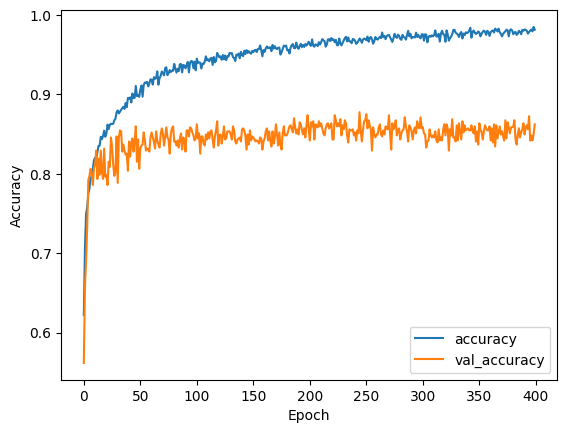

In [15]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

### Evaluating the model

In [9]:
model.evaluate(test_data, test_labels, verbose=2)

25/25 - 0s - loss: 0.9683 - accuracy: 0.8318 - 171ms/epoch - 7ms/step


[0.9682998657226562, 0.8318471312522888]

The model achieves an 83% accuracy on an out-of-distribution test set. This is a pretty good result, as the original paper achieves an 83-87% test accuracy a similar subset of the dataset. 400 epochs is probably not necessary for this model and dataset, as the validation accuracy stopped increasing at around 84%.

There were a couple of changes made from the original paper's approach. Firstly, I used an 80/10/10 split instead of an 85/15 split and then testing on a much larger dataset. This was just for efficiency reasons, as I'm developing on my personal laptop. The original paper also normalizes its data by dividing each heatmap by the maximum flux value. The purpose of this is to limit all of the values into the range [0, 1]. However, the dataset contains negative fluxes, some of which have a large magnitude. To account for this, I used min-max normalization instead, limiting values into the range [-1, 1].